# **CASE: ANTROPOMETRIA**

---

### Instalação de bibliotecas

In [ ]:
# As bibliotecas utilizadas neste notebook já vêm pré-instaladas no Google Colab

### Carregamento de bibliotecas

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA   # Redução de dimensões

### Leitura da base de dados

In [2]:
dados_antropometria = pd.read_table("../Dados/Antropometria.txt", sep = "\t")

### Visualização da base de dados

In [ ]:
display(dados_antropometria)

### Análise exploratória

In [3]:
# Medidas resumo: Altura
dados_antropometria['ALTURA'].describe()

count    100.000000
mean     178.963000
std        9.080934
min      153.800000
25%      174.000000
50%      178.700000
75%      184.100000
max      198.500000
Name: ALTURA, dtype: float64

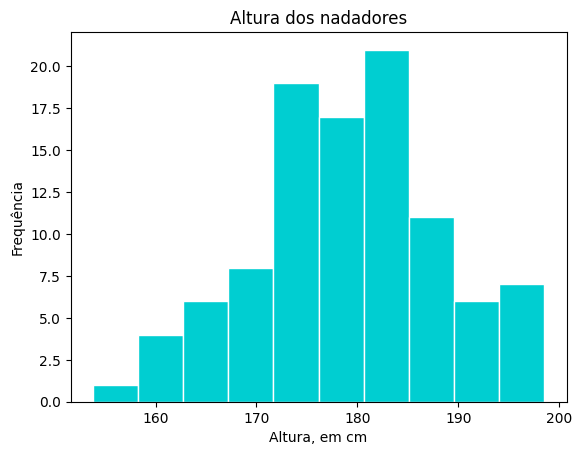

In [4]:
# Histograma: Altura
plt.hist(dados_antropometria['ALTURA'], bins = 10, color = 'darkturquoise', edgecolor = 'white')
plt.title('Altura dos nadadores')
plt.xlabel('Altura, em cm')
plt.ylabel('Frequência')
plt.show()

In [5]:
# Medidas resumo: Peso
dados_antropometria['PESO'].describe()

count    100.00000
mean      74.43600
std        6.10624
min       60.90000
25%       70.30000
50%       74.25000
75%       77.92500
max       92.30000
Name: PESO, dtype: float64

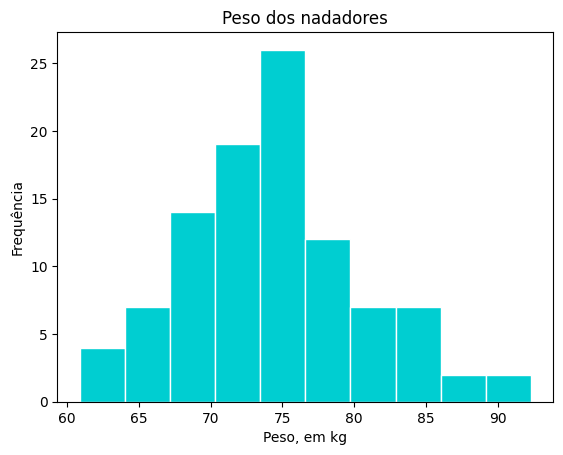

In [6]:
# Histograma: Peso
plt.hist(dados_antropometria['PESO'], bins = 10, color = 'darkturquoise', edgecolor = 'white')
plt.title('Peso dos nadadores')
plt.xlabel('Peso, em kg')
plt.ylabel('Frequência')
plt.show()

In [7]:
# Correlação entre altura e peso
dados_antropometria[['ALTURA', 'PESO']].corr()

,ALTURA,PESO
ALTURA,1.000000,0.684349
PESO,0.684349,1.000000


### Padronização da base

In [9]:
# Padronização pelo método z-score, excluindo primeira coluna (ID do nadador)
medias  = np.mean(dados_antropometria.drop(columns = ['NADADOR']), axis = 0)
desvios = np.std(dados_antropometria.drop(columns = ['NADADOR']), axis = 0)
dados_antropometria_padronizada = (dados_antropometria.drop(columns = ['NADADOR']) - medias) / desvios

### Análise de componentes principais

In [10]:
# Obtenção dos componentes
pca = PCA()
componentes = pca.fit_transform(dados_antropometria_padronizada)

In [11]:
# Verificação dos coeficientes
coeficientes = pd.DataFrame(pca.components_, columns = dados_antropometria_padronizada.columns)
display(coeficientes)

,ALTURA,PESO
0,0.707107,0.707107
1,-0.707107,0.707107


In [12]:
# Variabilidade retida (explicada) pelos componentes
display(pd.DataFrame(pca.explained_variance_ratio_, columns = ['Var. Retida']))

,Var. Retida
0,0.842175
1,0.157825


In [13]:
# Salvando os scores dos componentes na base de dados original
dados_antropometria_pca = pd.DataFrame(componentes, columns = [f'Comp_{i+1}' for i in range(componentes.shape[1])])
dados_antropometria = pd.concat([dados_antropometria, dados_antropometria_pca], axis = 1)

### Visualização da base de dados

In [14]:
# Ordenando do menor para o maior score no componente 1 (ordem ascendente)
dados_antropometria.sort_values(by = 'Comp_1').head(10)

,NADADOR,ALTURA,PESO,Comp_1,Comp_2
11,12,153.8,63.3,-3.265296,0.673190
60,61,160.4,63.6,-2.713868,0.191593
36,37,165.8,60.9,-2.605504,-0.545245
23,24,162.8,65.4,-2.316554,0.213261
20,21,162.4,67.7,-2.080175,0.512248
25,26,168.5,64.3,-1.998498,-0.360840
17,18,168.0,64.9,-1.967797,-0.251880
7,8,160.1,70.7,-1.911019,1.041397
26,27,165.2,68.9,-1.721387,0.432783
94,95,165.4,69.6,-1.624267,0.498600


In [15]:
# Ordenando do maior para o menor score no componente 1 (ordem descendente)
dados_antropometria.sort_values(by = 'Comp_1', ascending = False).head(10)

,NADADOR,ALTURA,PESO,Comp_1,Comp_2
65,66,195.8,92.3,3.396740,0.761430
78,79,198.5,84.6,2.711883,-0.346027
64,65,190.0,89.5,2.616959,0.889460
72,73,194.7,86.3,2.612350,0.149211
92,93,195.6,84.5,2.473292,-0.130713
18,19,193.6,83.8,2.235304,-0.055663
87,88,189.7,84.1,1.965008,0.284464
42,43,189.8,83.2,1.868088,0.171892
41,42,188.1,83.9,1.816516,0.386402
28,29,195.4,78.6,1.770974,-0.801728
